In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


from sklearn import metrics

# import warnings;
# warnings.filterwarnings('ignore');
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))    #/kaggle/input/social-network-ads/Social_Network_Ads.csv
    

In [2]:
#데이터셋 불러오기

df = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/소셜 네트워크 광고 판매 예측/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape #ID 400개, 변수 5개

(400, 5)

In [4]:
df.info() #데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#고유값 확인
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [6]:
#이 데이터 세트에는 500개의 샘플과 4개의 특징이 있다.
#'성별'과 '구매'는 범주형 변수
#'사용자 ID', '연령', '추정 판매'는 수치 변수
#'사용자 ID' 기능에 분산 데이터가 없으므로 해당 데이터를 삭제
#'Purchaseed'가 목표 변수이며 클래스는 두 가지

In [7]:
#사용자 ID' 기능 삭제

df.drop(columns='User ID',axis=1,inplace=True)

In [8]:
#결측값 백분율

df.isnull().sum()/len(df)*100

Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

<Axes: >

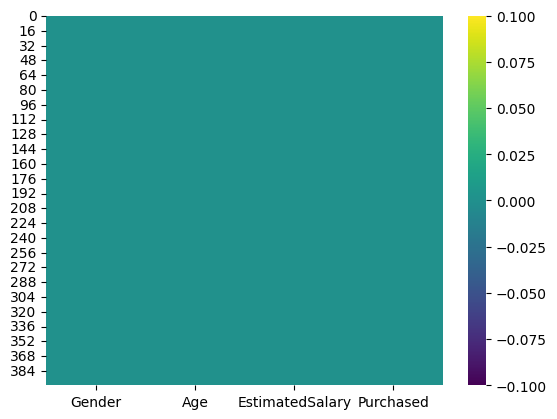

In [9]:
#결측값 시각화

sns.heatmap(df.isnull(), cmap = 'viridis')

In [10]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [11]:
#데이터 균형 확인

df['Purchased'].value_counts(normalize=True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

<Axes: xlabel='Purchased', ylabel='count'>

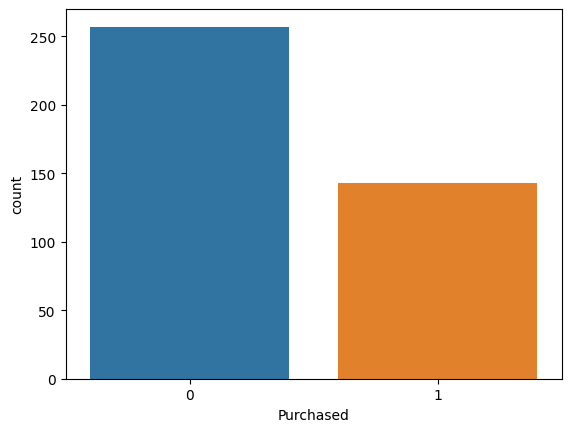

In [12]:
sns.countplot(x='Purchased',data=df)

In [13]:
#위의 관찰에서 이 데이터 세트는 null 값이 없으며 균형 데이터 세트라고 결론짓는다.
#'구매' 기능에서 클래스 0 --> '구매하지 않음', 클래스 1 ---> '구매'

In [14]:
#통계 정보 데이터

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [15]:
#특이치 확인

<Axes: xlabel='Age', ylabel='Count'>

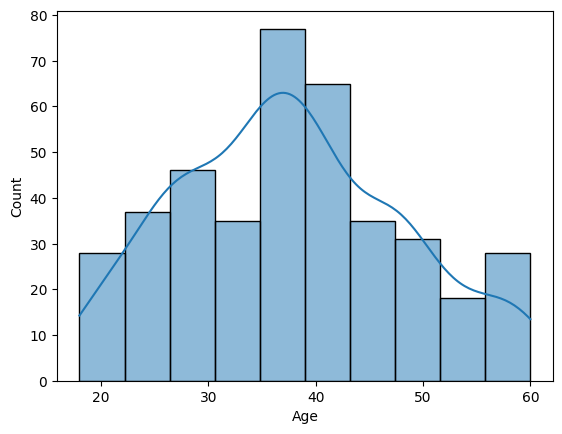

In [16]:
sns.histplot(df['Age'],kde=True)

<Axes: ylabel='EstimatedSalary'>

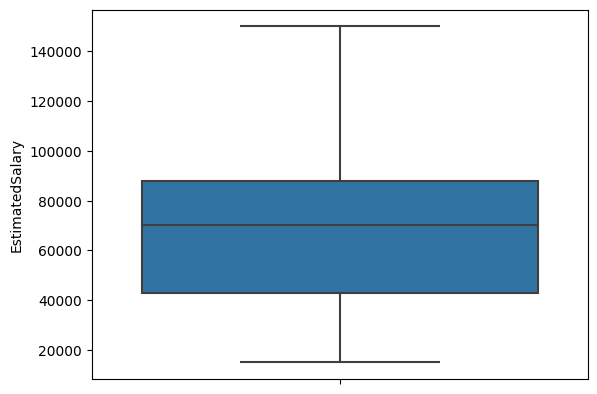

In [17]:
sns.boxplot(y=df['EstimatedSalary'])

In [18]:
#그림에서 보듯 특이치가 없음을 알 수 있다.

In [19]:
#EDA(탐색적 데이터 분석)분석

<Axes: xlabel='Gender', ylabel='count'>

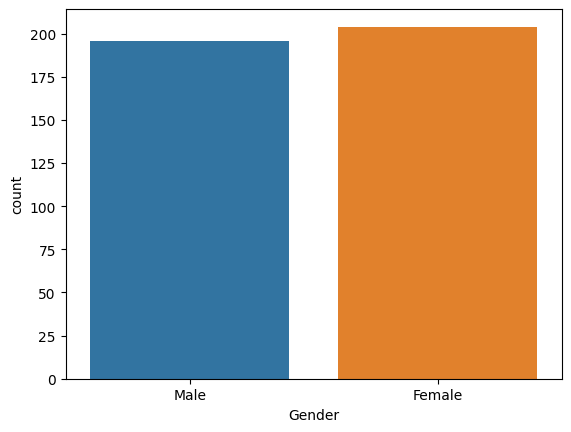

In [20]:
sns.countplot(x='Gender',data=df)

In [21]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [22]:
df.groupby('Gender')['Purchased'].value_counts()/len(df)*100

Gender  Purchased
Female  0            31.75
        1            19.25
Male    0            32.50
        1            16.50
Name: count, dtype: float64

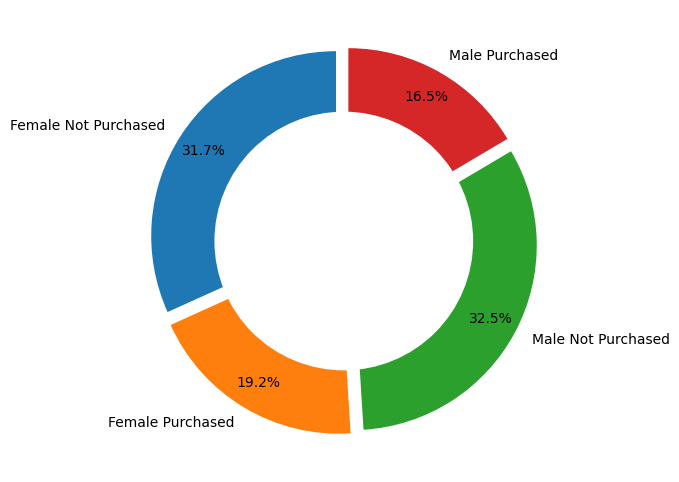

In [23]:
fig,ax = plt.subplots(figsize=(8, 6))

#원형 차트
labels =["Female Not Purchased","Female Purchased",
           "Male Not Purchased","Male Purchased" ]

data_per = df.groupby('Gender')['Purchased'].value_counts()/len(df)*100
sizes = [round(i, 2) for i in (list(data_per))]

explode = (0.05, 0.05, 0.05, 0.05)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#원형 색상
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

In [24]:
#구매자의 대다수가 여성임을 확인할 수 있다.

In [25]:
df.groupby('Gender')['Purchased'].mean()

Gender
Female    0.377451
Male      0.336735
Name: Purchased, dtype: float64

In [26]:
#여성 고객의 구매율이 남성 고객보다 높다는 결론을 내립니다

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

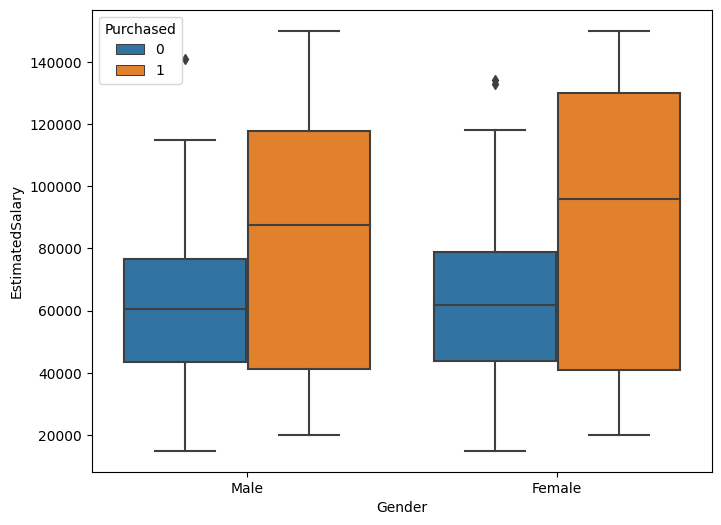

In [27]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='Gender',y='EstimatedSalary',data=df,hue='Purchased')

In [28]:
df.groupby(['Gender','Purchased'])['EstimatedSalary'].mean()

Gender  Purchased
Female  0            61480.314961
        1            88714.285714
Male    0            59630.769231
        1            83424.242424
Name: EstimatedSalary, dtype: float64

In [29]:
#급여등급이 높은 성별은 여성과 남성 모두 더 많은 구매를 한다는 것이다.

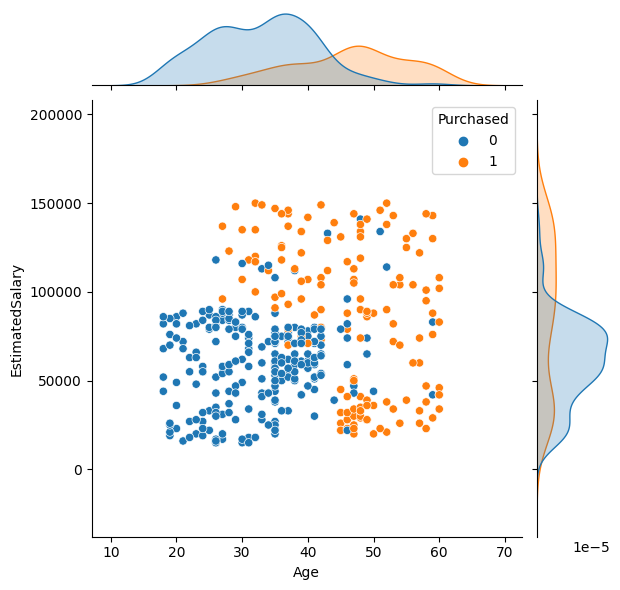

In [30]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased')

In [31]:
#위의 그림에서, 우리는 대부분의 제품이 40세에서 60세 사이의 사람들에 의해 구매되고 900000에서 150000으로 추정되는 급여 범위임을 알 수 있다.

<Axes: xlabel='Gender', ylabel='Age'>

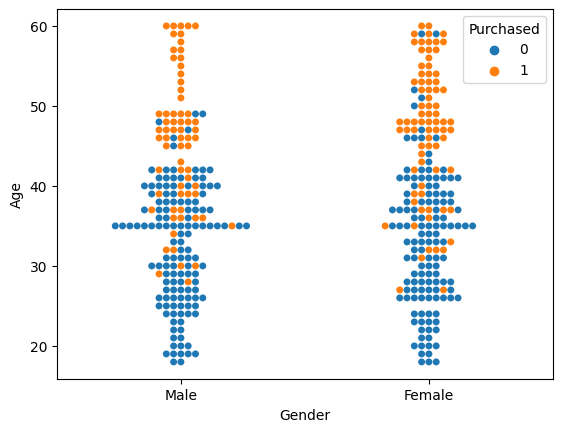

In [32]:
sns.swarmplot(x='Gender',y='Age',hue='Purchased',data=df)

In [33]:
df.groupby(['Gender','Purchased'])['Age'].mean()

Gender  Purchased
Female  0            33.110236
        1            47.155844
Male    0            32.484615
        1            45.500000
Name: Age, dtype: float64

In [34]:
#구매의 양이 20세에서 30세 사이에서 매우 적으며 대부분의 구매는 40세에서 60세 사이에서 이루어지고 있음을 확인해 준다

In [35]:
#종속변수와 독립변수를 분리

In [38]:
X = df.iloc[:,:3]
Y = df.iloc[:,3]

In [39]:
#범주형 카테고리 처리

In [40]:
X=pd.get_dummies(columns=['Gender'],data=X,drop_first=True)

In [41]:
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [42]:
#교육 및 테스트를 위한 데이터셋 분할

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=101)

In [44]:
#기능 축소

In [45]:
#Logistic Regression Mode
#선형 회귀 분석 모델

In [46]:
log_reg=LogisticRegression(random_state=2)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [47]:
#데이터셋 예측

train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

In [48]:
print("Logistic Regression Model Performance (Train Dataset):")
score=[]
accuracy = metrics.accuracy_score(y_train,train_pred)
precision =  metrics.precision_score(y_train,train_pred) 
recall =  metrics.recall_score(y_train,train_pred)   

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Logistic Regression Model Performance (Train Dataset):
------------------------------------
Precision: 0.00, Recall: 0.00, Accuracy: 0.64


C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("Logistic Regression Model Performance (Test Dataset):")

accuracy = metrics.accuracy_score(y_test,test_pred)
precision =   metrics.precision_score(y_test,test_pred) 
recall =  metrics.recall_score(y_test,test_pred)  
score.append(accuracy)
print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Logistic Regression Model Performance (Test Dataset):
------------------------------------

Precision: 0.00, Recall: 0.00, Accuracy: 0.65


C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#Decision Tree Classifier

In [56]:
dt_model = DecisionTreeClassifier(random_state=2,max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [57]:
test_pred = dt_model.predict(X_test)
train_pred = dt_model.predict(X_train)

In [58]:
print("Decision Tree Model Performance (Train Dataset):")

accuracy = metrics.accuracy_score(y_train,train_pred)
precision =  metrics.precision_score(y_train,train_pred) 
recall =  metrics.recall_score(y_train,train_pred)   
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Decision Tree Model Performance (Train Dataset):
------------------------------------
Precision: 0.92, Recall: 0.94, Accuracy: 0.95


In [59]:
print("Decision Tree Model Performance (Test Dataset):")

accuracy = metrics.accuracy_score(y_test,test_pred)
precision =   metrics.precision_score(y_test,test_pred) 
recall =  metrics.recall_score(y_test,test_pred)    
score.append(accuracy)
print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Decision Tree Model Performance (Test Dataset):
------------------------------------

Precision: 0.85, Recall: 0.94, Accuracy: 0.92


In [60]:
#Random Forest Classifie

In [61]:
rf_model = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=5)
rf_model.fit(X_train, y_train)

test_pred = rf_model.predict(X_test)
train_pred = rf_model.predict(X_train)

In [62]:
print("Random Forest Model Performance (Train Dataset):")

accuracy = metrics.accuracy_score(y_train,train_pred)
precision =  metrics.precision_score(y_train,train_pred) 
recall =  metrics.recall_score(y_train,train_pred)   
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Random Forest Model Performance (Train Dataset):
------------------------------------
Precision: 0.89, Recall: 0.94, Accuracy: 0.94


In [63]:
print("Random Forest Model Performance (Test Dataset):")

accuracy = metrics.accuracy_score(y_test,test_pred)
precision =   metrics.precision_score(y_test,test_pred) 
recall =  metrics.recall_score(y_test,test_pred)    
score.append(accuracy)
print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

Random Forest Model Performance (Test Dataset):
------------------------------------

Precision: 0.81, Recall: 0.97, Accuracy: 0.91


In [65]:
#K-Nearest Neighbours Classifier

In [66]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

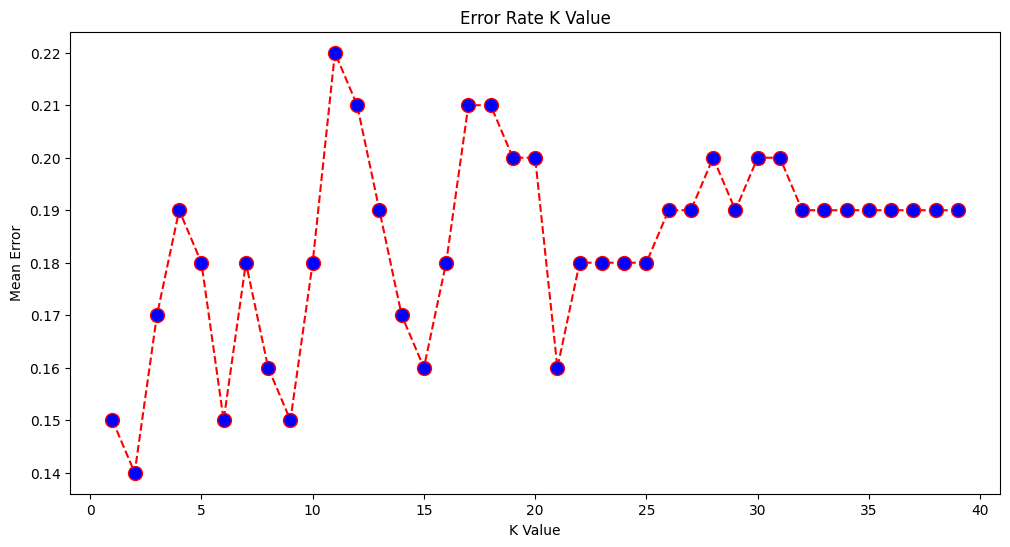

In [68]:
plt.figure(figsize=(12, 6))  

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate K Value')  

plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

plt.show()

In [69]:
classifier = KNeighborsClassifier(n_neighbors=15)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=15)

In [70]:
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)  

In [71]:
print("K-Nearest Neighbours Model Performance (Train Dataset):")

accuracy = metrics.accuracy_score(y_train,train_pred)
precision =  metrics.precision_score(y_train,train_pred) 
recall =  metrics.recall_score(y_train,train_pred)   
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

K-Nearest Neighbours Model Performance (Train Dataset):
------------------------------------
Precision: 0.81, Recall: 0.65, Accuracy: 0.82


In [72]:
print("K-Nearest Neighbours Model Performance (Test Dataset):")

accuracy = metrics.accuracy_score(y_test,test_pred)
precision =   metrics.precision_score(y_test,test_pred) 
recall =  metrics.recall_score(y_test,test_pred)    
score.append(accuracy)
print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

K-Nearest Neighbours Model Performance (Test Dataset):
------------------------------------

Precision: 0.83, Recall: 0.69, Accuracy: 0.84


In [73]:
#SVC Model

In [75]:
svc_model = SVC( kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

test_pred = svc_model.predict(X_test)
train_pred = svc_model.predict(X_train)


In [76]:
print("SVC Model Performance (Train Dataset):")

accuracy = metrics.accuracy_score(y_train,train_pred)
precision =  metrics.precision_score(y_train,train_pred) 
recall =  metrics.recall_score(y_train,train_pred)   
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

SVC Model Performance (Train Dataset):
------------------------------------
Precision: 0.87, Recall: 0.43, Accuracy: 0.77


In [77]:
print("SVC Model Performance (Test Dataset):")

accuracy = metrics.accuracy_score(y_test,test_pred)
precision =   metrics.precision_score(y_test,test_pred) 
recall =  metrics.recall_score(y_test,test_pred)    
score.append(accuracy)
print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')

SVC Model Performance (Test Dataset):
------------------------------------

Precision: 0.81, Recall: 0.49, Accuracy: 0.78


In [78]:
#Compare Models Performance

In [79]:
models = pd.DataFrame({
    'Model': ['Logistic','Decision Tree','Random Forest','KNN', 'SVC'],
             
    'Score': score
})

models.head()

,Model,Score
0,Logistic,0.65
1,Decision Tree,0.92
2,Random Forest,0.91
3,KNN,0.84
4,SVC,0.78


<Axes: xlabel='Model', ylabel='Score'>

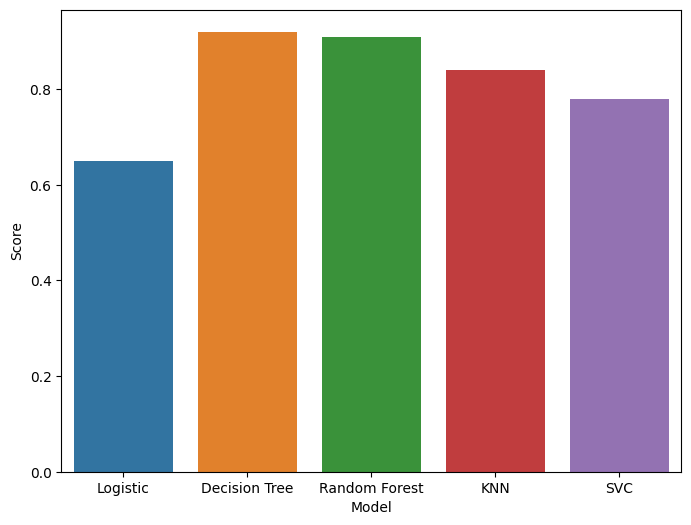

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model',y='Score',data=models)

In [81]:
#결론:위의 그림은 의사결정 나무, 랜덤 포레스트 모델이 90%의 정확도를 보인다.